## KNN Regressor

Function which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (K). It should return the regressed values for the test data points. The distance function used to measure the distance between a pair of data points is Manhattan distance function.

Before we start we import the libraries that are going to be used to perform the tasks:
 - **reshape:** To build the matrix with the error of train vs. test data and store them in the same data frame
 - **ggplot:** Plot the visualizations

In [1]:
library(reshape2)
library(ggplot2)

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Now we build the KNN Regressor function as follows:

In [2]:
# KNN regressor function
knn.reg <- function(train.data, train.label, test.data, K=3, distance = 'manhattan'){
    
    # Convert the data to dataframe
    if(!is.data.frame(train.data)){ # If train.data is not a dataframe
        train.data = data.frame(train.data) # Build a dataframe with a vector 
        names(train.data)  <- c('n') # Change the name of the unique column to match with test 
    }
    if(!is.data.frame(test.data)){ # If test.data is not a dataframe
        test.data = data.frame(test.data) # Build a dataframe with a vector 
        names(test.data)  <- c('n') # Change the name of the unique column to match with test 
    }
    
    
    # Get the number of rows of each dataframe
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    
    # Creating the returning variable
    test.label <- c()
    
    # Calculate distances between samples and get the important part of the matrix
    dist <- as.matrix(dist(rbind(test.data, train.data), method = distance))[1:test.len, (test.len+1):(test.len+train.len)]

    ## for each test sample
    for (i in 1:train.len){
        # Find its K nearest neighbours from training samples
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]

        ### And calculate the predicted labels with the mean
        test.label[i]<- mean(train.label[nn])        
    }
    
    ## return the class labels as output
    return (test.label)
}

II. <span style="color:red">[5 marks]</span> Plot the training and the testing errors versus 1/K for K=1,.., 35
in one plot, using the Task1A_train.csv and Task1A_test.csv datasets 
provided for this assignment. Save the plot in your Jupyter Notebook file 
for Question 1. Report your chosen error function in your Jupyter
Notebook file. 

We import the data given in CSV format as follows:

In [3]:
train.data <- read.csv(file = "data/train.csv")[,1] # First Column 
train.label <- read.csv(file = "data/train.csv")[,2] # Second Column
test.data <- read.csv(file = "data/test.csv")[,1] # First Column
test.label <- read.csv(file = "data/test.csv")[,2] # Second Column

Before we test the error between testing and trainning. We proceed to plot the predictions against the true value to understand a lit bit the error before plot it. We are going to use different K (3, 10, 20 and 30).

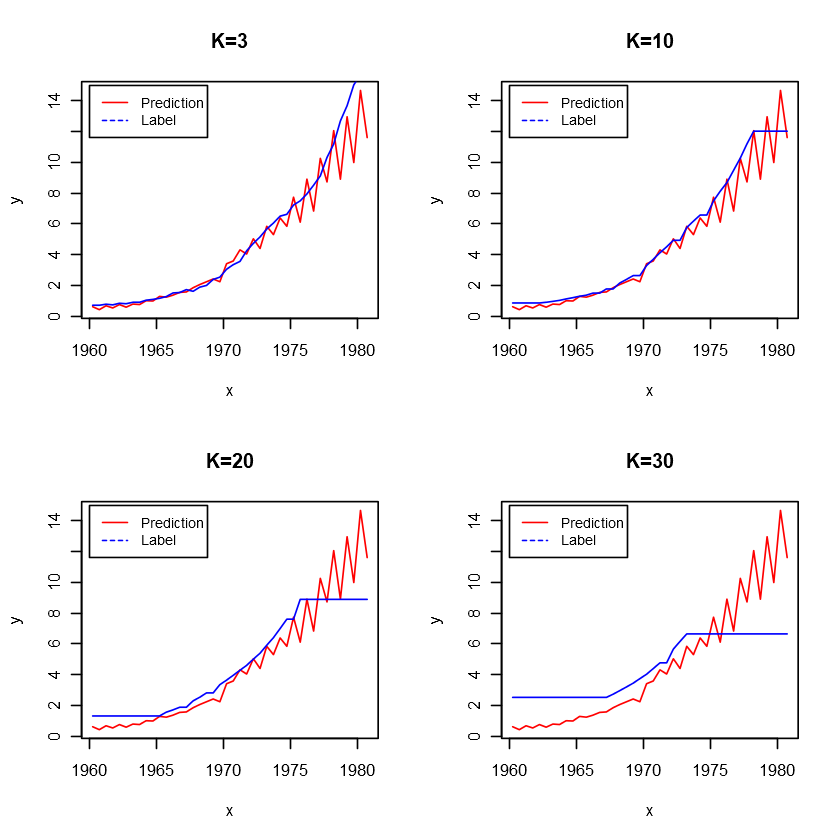

In [4]:
# Predict values with different K values
pred.label3 <- knn.reg(train.data, train.label, test.data, K=3, distance = 'manhattan') # k=3
pred.label10 <- knn.reg(train.data, train.label, test.data, K=10, distance = 'manhattan') # k=10
pred.label20 <- knn.reg(train.data, train.label, test.data, K=20, distance = 'manhattan') # k=20
pred.label30 <- knn.reg(train.data, train.label, test.data, K=30, distance = 'manhattan') #k=30

# Plot a comparison between the predicted value with different values of K
par(mfrow = c(2, 2)) # Plot 2X2
plot(test.data, test.label, type = "l", col = "red", xlab="x", ylab="y", main="K=3") # Plot the real values 
lines(test.data, pred.label3,  col = "blue") # Plot the predicted values with K=3
legend(1960, 15, legend=c("Prediction", "Label"), col=c("red", "blue"), lty=1:2, cex=0.8) # Set details of the plot

plot(test.data, test.label, type = "l", col = "red", xlab="x", ylab="y", main="K=10")  # Plot the real values 
lines(test.data, pred.label10,  col = "blue")  # Plot the predicted values with K=10
legend(1960, 15, legend=c("Prediction", "Label"), col=c("red", "blue"), lty=1:2, cex=0.8) # Set details of the plot

plot(test.data, test.label, type = "l", col = "red", xlab="x", ylab="y", main="K=20")  # Plot the real values 
lines(test.data, pred.label20,  col = "blue")  # Plot the predicted values with K=20
legend(1960, 15, legend=c("Prediction", "Label"), col=c("red", "blue"), lty=1:2, cex=0.8) # Set details of the plot

plot(test.data, test.label, type = "l", col = "red", xlab="x", ylab="y", main="K=30")  # Plot the real values 
lines(test.data, pred.label30,  col = "blue")  # Plot the predicted values with K=30
legend(1960, 15, legend=c("Prediction", "Label"), col=c("red", "blue"), lty=1:2, cex=0.8) # Set details of the plot

Now we proceed to calculate the error between the test and the trainning data with different values of K, by using the method of Mean Square Error shown below:

$$\frac{1}{n}\space\Sigma_{i=1}^{n}{(Y_i -\hat{Y}_i)^2}$$

In [5]:
# calculate the train and test missclassification rates for K in 1:35
miss <- data.frame('K'=1:35, 'MSE_train'=rep(0,35), 'MSE_test'=rep(0,35))
for (k in 1:35){
    miss[k,'MSE_train'] <- mean((knn.reg(train.data, train.label, train.data, K=k) - train.label)^2) # Store the MSE of trainning data
    miss[k,'MSE_test'] <- mean((knn.reg(train.data, train.label, test.data, K=k) - test.label)^2) # Store the MSE of testing data
}
head(miss)

K,MSE_train,MSE_test
1,0.02249524,1.699390
2,0.13160595,2.104327
3,0.12246720,1.704444
4,0.16431280,1.868218
5,0.19115829,1.377253
6,0.28487169,1.459902


Finally, we proceed to plot the training and the testing errors versus 1/K for K between 1 and 35 in one plot, using the datasets given

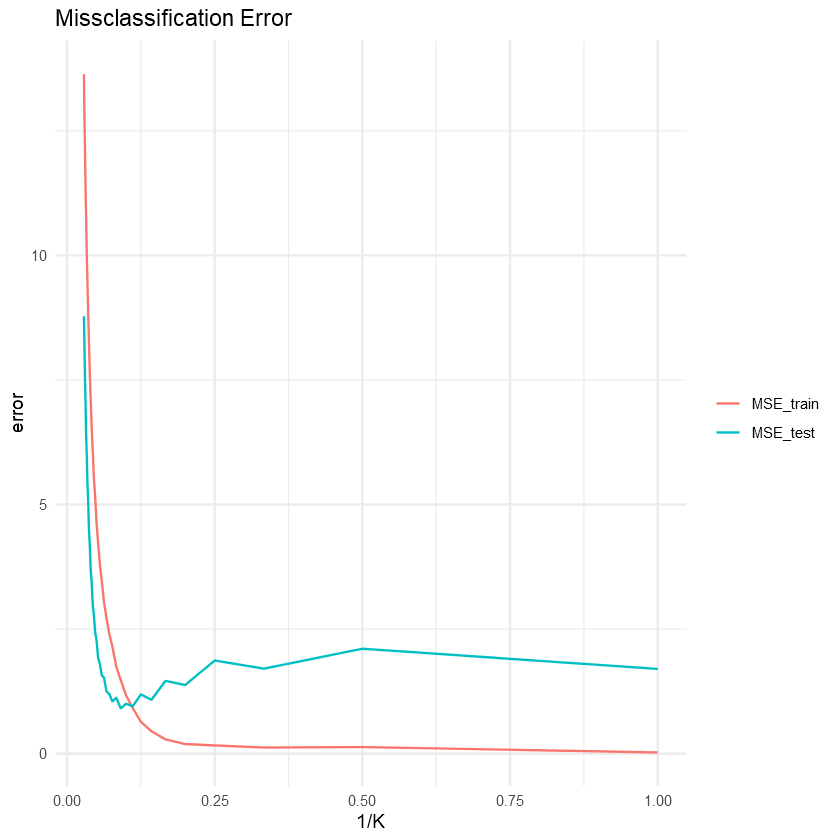

In [6]:
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

In [7]:
cat("The K that returns the smallest MSE for training data is",which.min(miss$MSE_train))

The K that returns the smallest MSE for training data is 1

In [8]:
cat("The K that returns the smallest MSE for test data is",which.min(miss$MSE_test))

The K that returns the smallest MSE for test data is 11

The optimum value of K is ~approximately 10, when $\frac{1}{K} \approx 0.2$, that is when the <font color = "salmon">MSE_train</font> is equal to <font color=#48C9B0>MSE_test</font>. When the two curves cross each other. 

After this point the <font color=#48C9B0>MSE_test</font> starts to increase and the <font color = "salmon">MSE_train</font> keeps decreasing until it gets to almost 0, this is a signal of **overfitting** as the training dataset has a MSE pretty low while the error of the test data is high.

Before this point the <font color = "salmon">MSE_train</font> and the <font color=#48C9B0>MSE_test</font> are both high, signal of underfitting. 

Finally, we can understand that the higher the K the less complex the model is, and therefore the model is underfitted, and the lower the K is the more complex the model is and therefore the model is overfitted